We will reviewed a number of metrics for **evaluating classification** and **regression** models. 
For that we use the functions we use of the **sklearn** library. 
We'll learn how to generate model data and how to train linear models and evaluate their quality. 

## sklearn.metrics

[Docs](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Datasets generation
Since we are to solve 2 problems: Classification and Regression, we'll need 2 sets of data. 

For that we use **make_classification** and **make_regression** functions. 

For each problem we generate datasets of 2 features and we visualize them. In the Classification problem both features are informative, while in Regression problem, only 1 of 2 features is an informative feature.

In [2]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [3]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

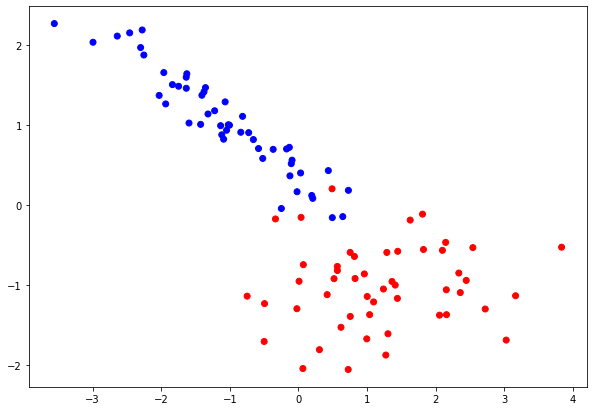

In [57]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)
pylab.rcParams['figure.figsize'] = [10, 7]

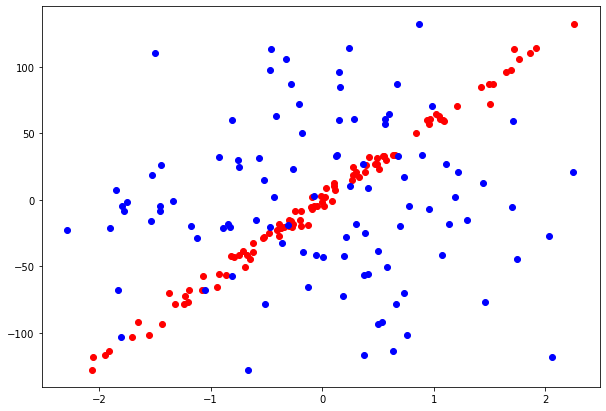

In [58]:
pylab.scatter(reg_data[:,1], reg_target, color = 'r')
pylab.scatter(reg_data[:,0], reg_target, color = 'b')
pylab.rcParams['figure.figsize'] = [10, 7]

#### We split data into train and test sets.

In [8]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [9]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Quality metrics in classification tasks

#### Classification model training

We'll use **SGDClassifier**. It is a Linear classifier based on [Stochastic gradient decent](/linear-regression-stochastic-gradient-descent/). 
- Probabilistic classifier (Loss funciton: loss = 'log')

In [11]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000)

classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(loss='log', random_state=1)

Generate classifier predicted labels:

In [12]:
predictions = classifier.predict(clf_test_data)

Generate a prediction in the form of the probability that the object belongs to the zero class or the first class.

In [13]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [15]:
# original dataset labels
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [16]:
# predicted labels
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]


Probabilities that the object belongs to the zero class or the first class. 

The first probability is that object belongs to the the zero class and the second probability is that object belongs to the first class

In [17]:
print(probability_predictions[:10])

[[0.00000000e+00 1.00000000e+00]
 [9.99999997e-01 2.90779994e-09]
 [9.99990982e-01 9.01818055e-06]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.01333183e-14]
 [5.16838702e-07 9.99999483e-01]
 [6.66133815e-16 1.00000000e+00]
 [1.00000000e+00 6.21822808e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999998e-01 2.30155106e-09]]


We've done the preparational work. Now we come to the calculating metrics.
#### Accuracy

Accuracy is metric that shows **closeness of the measurements to a specific value**, designating a **portion of correctly classified objects**.

- **pair[0]** - correct label
- **pair[1]** - predcted label 
- **len(clf_test_labels)** - data volume

In [21]:
# calculating thru Python means
acc1 = sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)
# inbuilt accuracy score
acc2 = metrics.accuracy_score(clf_test_labels, predictions)
print (acc1, acc2)

0.9333333333333333 0.9333333333333333


#### [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

**Confusion matrix** is the **NxN** matrix where N - number of classes (N=2 in our case). Confusion matrix provides to calcualte many statistics metrics.

In [23]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print("Confusion matrix\n",  matrix)

Confusion matrix
 [[17  1]
 [ 1 11]]


In [24]:
# manual calculations of True positives and True negatives
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

28

In [25]:
matrix.diagonal().sum()

28

#### Precision 

Precision describes the random errors, a measure of statistical variability.

First we estimate the accuracy of the classification to the zero class. We call the **precision_score()** function, pass it the correct class labels, the predicted class labels. And since by default our label is 1, we need to explicitly say that in this case we estimate the classification accuracy to the zero class. To do this, we use the **pos_label** argument and say that it is equal to **0**.

In [26]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

We estimate the accuracy of the objects classification to the first class. Default pos_label = 1.

In [25]:
metrics.precision_score(clf_test_labels, predictions)

0.9230769230769231

#### [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall)
A good picture of precision and recall is below:

In [29]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [30]:
metrics.recall_score(clf_test_labels, predictions)

0.9166666666666666

#### [F-score](https://en.wikipedia.org/wiki/F-score)

In [31]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [32]:
metrics.f1_score(clf_test_labels, predictions)

0.9166666666666666

#### Classification report 
We use the **classification_report** function to get the summary table for each class.

In [33]:
print(metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) - receiver operating characteristic curve

An ROC curve plots TPR vs FPR at different classification thresholds. We use **probability_predictions** in our case.
- **probability_predictions[:,1]** is the probability that object is of the first class.


In [43]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])
# _ contains thresholds, we not using them 

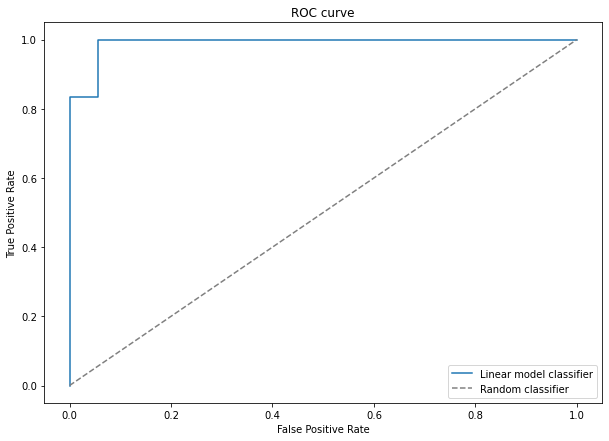

In [42]:
pylab.plot(fpr, tpr, label = 'Linear model classifier')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'Random classifier')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right") 
pylab.rcParams['figure.figsize'] = [10, 7]

#### ROC AUC

ROC AUC shows a square area under ROC function.

In [44]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9305555555555554

In [45]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### PR AUC - Precision AUC

In [46]:
metrics.average_precision_score(clf_test_labels, predictions)

0.873611111111111

#### log_loss - logistical losses of [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [47]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.21767621111290084

### Metrics in the Regression problem

#### Training the regression model

In [50]:
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 20)

regressor.fit(reg_train_data, reg_train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(max_iter=20, random_state=1)

In [52]:
reg_predictions = regressor.predict(reg_test_data)

In [53]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [54]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### MAE - Mean Absolute Error

In [55]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### MSE - Mean Squared Error

In [43]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### Mathematical Square Root of MSE

In [56]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

#### [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) - R2 score

The close R2 score to 1 the better/preciser model we have.

In [45]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695